<a href="https://colab.research.google.com/github/Jeshwanth2/AI-ML-Internship-Task-12/blob/main/KMeansCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive statistics for 'Annual Income (k$)' and 'Spending Score (1-100)':")
print(df[['Annual Income (k$)', 'Spending Score (1-100)']].describe())

First 5 rows of the DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descrip

In [2]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Original features (first 5 rows):")
print(X.head())
print("\nScaled features (first 5 rows):")
print(X_scaled[:5])

Original features (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Scaled features (first 5 rows):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


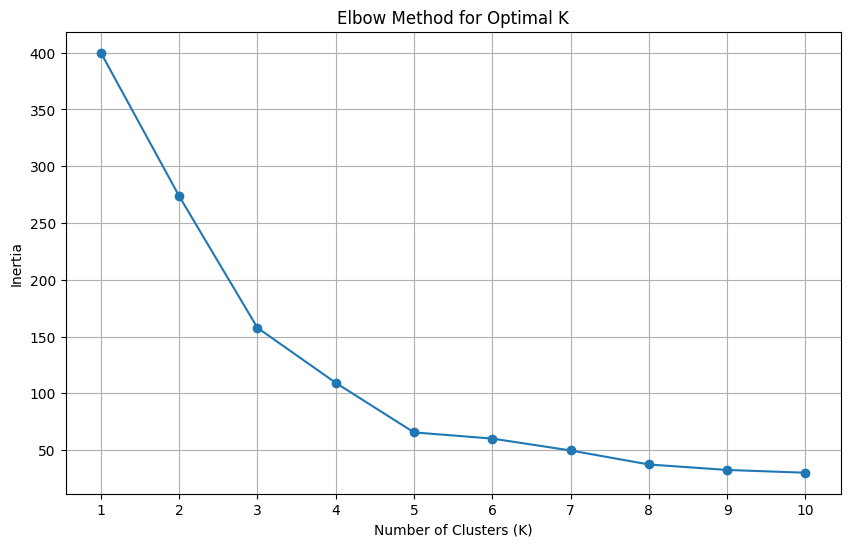

Inertia values calculated for K from 1 to 10.


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

k_range = range(1, 11)

for k in k_range:

    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')

    kmeans_model.fit(X_scaled)

    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.xticks(k_range)
plt.show()

print("Inertia values calculated for K from 1 to 10.")

In [4]:
from sklearn.cluster import KMeans

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

kmeans.fit(X_scaled)

print(f"K-Means model trained with {optimal_k} clusters.")

K-Means model trained with 5 clusters.


In [5]:
import pandas as pd

df['Cluster'] = kmeans.labels_

print("DataFrame with Cluster labels (first 5 rows):")
print(df.head())


df.to_csv('segmented_mall_customers.csv', index=False)

print("Segmented data saved to 'segmented_mall_customers.csv'.")

DataFrame with Cluster labels (first 5 rows):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
Segmented data saved to 'segmented_mall_customers.csv'.


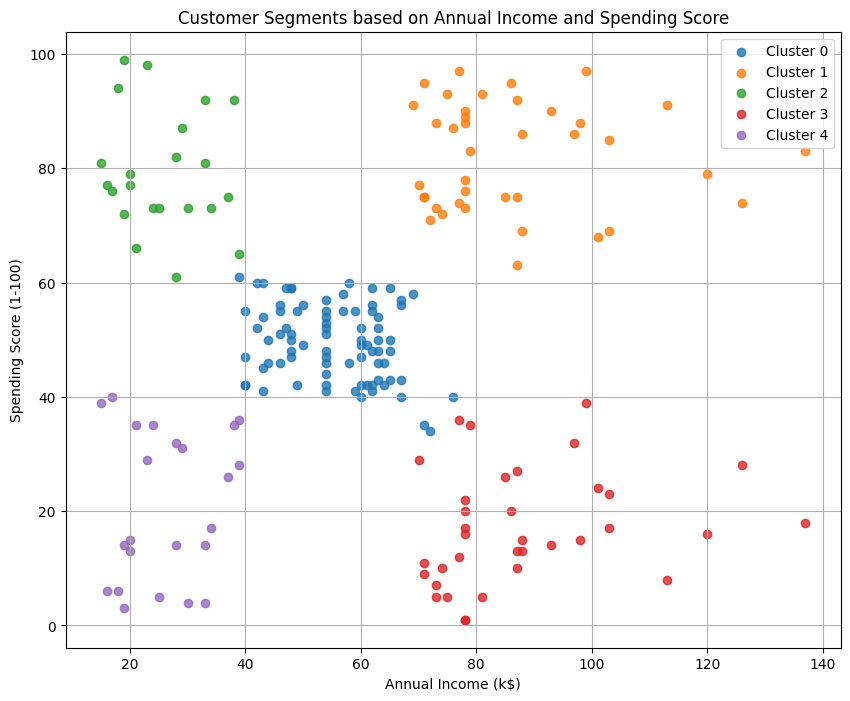

Scatter plot of customer clusters displayed.


In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

unique_clusters = df['Cluster'].unique()

for cluster_label in sorted(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster_label}',
        alpha=0.8
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Annual Income and Spending Score')

plt.legend()

plt.grid(True)

plt.show()

print("Scatter plot of customer clusters displayed.")

In [7]:
import pandas as pd

cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("Mean Annual Income and Spending Score for each Cluster:")
print(cluster_means)

cluster_labels = {
    0: 'Standard Customers',
    1: 'Target Customers (High-Income, High-Spending)',
    2: 'Low-Income, High-Spending',
    3: 'High-Income, Low-Spending',
    4: 'Low-Income, Low-Spending'
}

print("\nDescriptive labels for each cluster:")
for cluster_id, label in cluster_labels.items():
    print(f"Cluster {cluster_id}: {label}")

cluster_means['Cluster Label'] = cluster_means.index.map(cluster_labels)
print("\nCluster Means with Labels:")
print(cluster_means)

Mean Annual Income and Spending Score for each Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Descriptive labels for each cluster:
Cluster 0: Standard Customers
Cluster 1: Target Customers (High-Income, High-Spending)
Cluster 2: Low-Income, High-Spending
Cluster 3: High-Income, Low-Spending
Cluster 4: Low-Income, Low-Spending

Cluster Means with Labels:
         Annual Income (k$)  Spending Score (1-100)  \
Cluster                                               
0                 55.296296               49.518519   
1                 86.538462               82.128205   
2                 25.727273               79.363636   
3                 88.200000               